In [172]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [174]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [175]:
data.shape

(5572, 5)

In [176]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [177]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [178]:
data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [179]:
data.shape

(5572, 5)

In [180]:
print(data.columns)
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
print(data.columns)
if len(data.columns) == 2:
    data.columns = ['label', 'message']
else:
    print(f"Column mismatch: Expected 2 columns, but found {len(data.columns)}")


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Index(['v1', 'v2'], dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

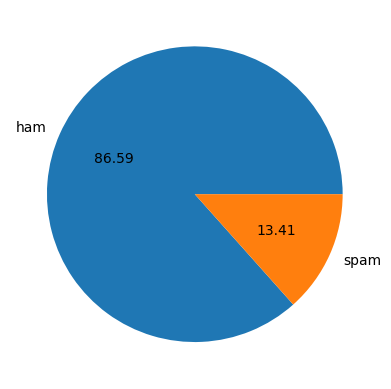

In [181]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

In [182]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [183]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [184]:
STOPWARDS= set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^0-9a-zA-Z]', '', text)
    text=re.sub(r'\s+','',text)
    text=re.sub(r'\s+','',text)
    text=" ".join(word for word in text.split() if word not in STOPWARDS)
    return text

In [185]:
data['clean_text']= data['message'].apply(clean_text)
data.head()

,label,message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",gountiljurongpointcrazyavailableonlyinbugisngr...
1,ham,Ok lar... Joking wif u oni...,oklarjokingwifuoni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,freeentryin2awklycomptowinfacupfinaltkts21stma...
3,ham,U dun say so early hor... U c already then say...,udunsaysoearlyhorucalreadythensay
4,ham,"Nah I don't think he goes to usf, he lives aro...",nahidontthinkhegoestousfhelivesaroundherethough


In [186]:
X=data['clean_text']
y=data['label']

In [187]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)
data['message'] = data['message'].apply(remove_stopwords)
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42,shuffle=True,stratify=y)

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import cross_val_score
def Classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42,shuffle=True,stratify=y)
    pipeline_model=Pipeline([('vect',CountVectorizer()),
                             ('tfidf',TfidfTransformer()),
                             ('clf',model)])
    pipeline_model.fit(X_train,y_train)
    print('Accuracy:',pipeline_model.score(X_test,y_test)*100)

In [189]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
Classify(model,X,y)
print("Classification Report:\n", report)

Accuracy: 97.04035874439462
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [190]:
from sklearn.svm import SVC
model=SVC()
Classify(model,X,y)
print("Classification Report:\n", report)

Accuracy: 97.9372197309417
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

